In [1]:
cd src

D:\Python\chess\src


In [2]:
import chess
from trainer import Trainer
from chessbot import ChessBot
import numpy as np
from pystockfish import Engine 

trainer = Trainer()
board = chess.Board()
gruefish = ChessBot()
gruefish2 = ChessBot()
stockfish = Engine(depth=20, param={"Threads": 6})
shitfish = Engine(depth=0, param={"Threads": 6})

Using TensorFlow backend.


{'temp_score': 0.5, 'score': 0.5, 'move': Move.from_uci('g8f6'), 'dead': False}
{'temp_score': 0.2882072925567627, 'score': 0.2882072925567627, 'move': Move.from_uci('g1f3'), 'dead': False}
{'temp_score': 0.5, 'score': 0.5, 'move': Move.from_uci('d7d5'), 'dead': False}
{'temp_score': 0.38687151670455933, 'score': 0.38687151670455933, 'move': Move.from_uci('c2c4'), 'dead': False}
{'temp_score': 0.49525297, 'score': 0.49525297, 'move': Move.from_uci('e7e6'), 'dead': False}
{'temp_score': 0.2909393310546875, 'score': 0.2909393310546875, 'move': Move.from_uci('g1f3'), 'dead': False}
{'temp_score': 0.39941141, 'score': 0.39941141, 'move': Move.from_uci('f7f5'), 'dead': False}
{'temp_score': 0.22266566753387451, 'score': 0.22266566753387451, 'move': Move.from_uci('g1f3'), 'dead': False}
{'temp_score': 0.38687151670455933, 'score': 0.38687151670455933, 'move': Move.from_uci('d7d5'), 'dead': False}
{'temp_score': 0.38687151670455933, 'score': 0.38687151670455933, 'move': Move.from_uci('c2c4'),

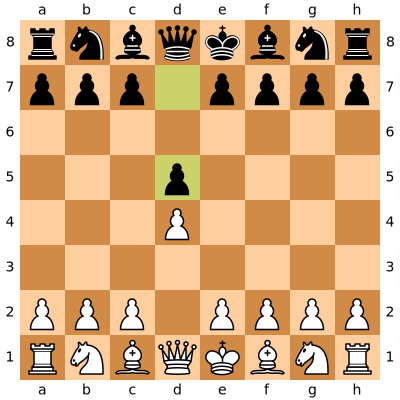

In [4]:
if board.is_game_over():
    print(board.result())
else:
    if board.turn == chess.WHITE:
        #board.push(trainer.best_move(board, filter=True, eval=True))
        board.push(gruefish.best_move(board, eval=True, think_time=10))
    else:
        #board.push(trainer.best_move(board, filter=True, eval=True))
        board.push(gruefish2.best_move(board, eval=True, think_time=10))

board

In [ ]:
board.pop()

In [ ]:
%%timeit

gruefish.count_pieces(board)

In [ ]:
board.reset()
gruefish.clear_cache()

In [ ]:
%%timeit

gruefish.clear_cache()
gruefish.best_move(board, depth=3, think_time=999)

In [ ]:
board.fen()

In [ ]:
board.set_fen('R7/5k2/8/2p4p/P1p2P1P/2P5/2K2P2/8 w - - 17 47')
board

In [ ]:
chessbot.best_move(board, eval=True)

In [ ]:
while not board.is_game_over():
    if board.turn == chess.WHITE:
        board.push(gruefish.best_move(board, eval=True, depth=10, think_time=5))
        #board.push(trainer.best_move(board, filter=True))
    else:
        #board.push(trainer.best_move(board, filter=True))
        board.push(gruefish2.best_move(board, eval=True, depth=10, think_time=25))
print(board.result(), len(board.move_stack))

In [ ]:
len(board.move_stack)

In [ ]:
board.reset()

In [ ]:
print(trainer.test_winrate())

In [ ]:
board, won = trainer.play_vs_sunfish(True)

In [ ]:
board, won = trainer.play_vs_stockfish(True, shitfish, think_time=500)

In [ ]:
trainer.train_from_cache()

In [ ]:
print(won)

In [ ]:
temp_board = chess.Board()
move_num = 0

In [ ]:
if len(board.move_stack) > move_num:
    temp_board.push(board.move_stack[move_num])
    move_num += 1

temp_board

In [ ]:
#file = open("ficsgamesdb_2016_standard2000_nomovetimes_1435145.pgn")
file = open("ficsgamesdb_2016_chess_nomovetimes_1445486.pgn")

In [ ]:
game = chess.pgn.read_game(file)
board = game.end().board()

In [ ]:
game.headers['Result']

In [ ]:
trainer.train_from_match(board, game.headers['Result'])

In [ ]:
cd src

In [ ]:
from model_conv import model

In [ ]:
board.reset()
board.push(chess.Move.from_uci('c2c4'))
trainer.best_move(board, eval=True)


board.push(chess.Move.from_uci('g8f6'))
print(board)

In [ ]:
batch_x = np.zeros(shape=(1, 8, 8, 12), dtype=np.int8)
batch_x[0] = chessbot.board_to_matrix(board)
model.predict_proba(batch_x)

In [ ]:
stockfish.setfenposition('rnb1k2r/ppq2ppp/4p3/3p4/3P4/2bBPN2/P1P2PPP/3Q1RK1 b kq - 1 11')
stockfish.bestmove()